<a href="https://colab.research.google.com/github/Marwa-Chouhdary/Data-Science-Projects/blob/main/Churn_Prediction_for_a_Telecom_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Prediction for a Telecom Company

#Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


#Load & Clean Data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = df.copy()

# Remove whitespace from headers
df.columns = df.columns.str.strip()

# Handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Drop customerID
df.drop('customerID', axis=1, inplace=True)


/tmp/ipython-input-2-707272875.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


#EDA

Text(0.5, 1.0, 'Churn Distribution')

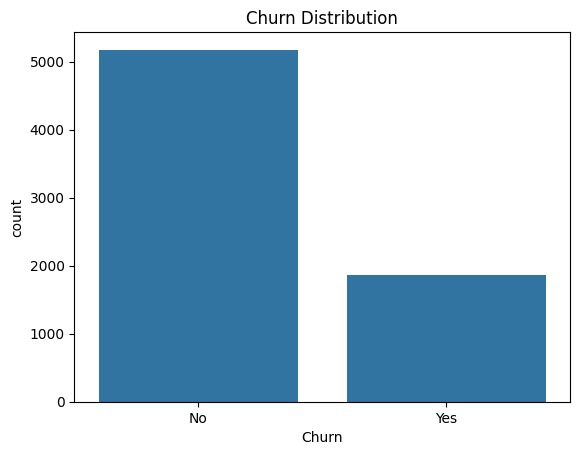

In [3]:
# Churn distribution
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')

Text(0.5, 1.0, 'Contract Type vs Churn')

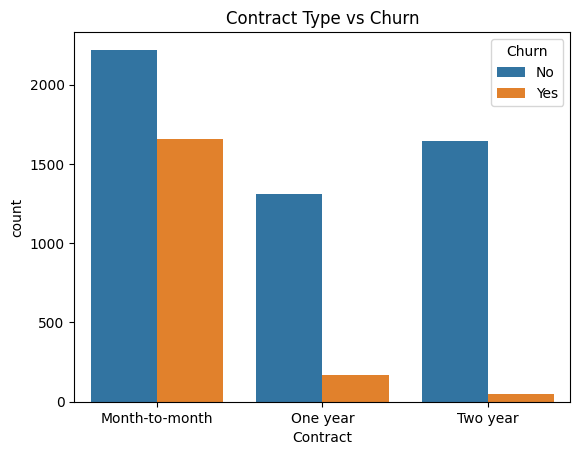

In [4]:
# Contract type vs churn
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Contract Type vs Churn')

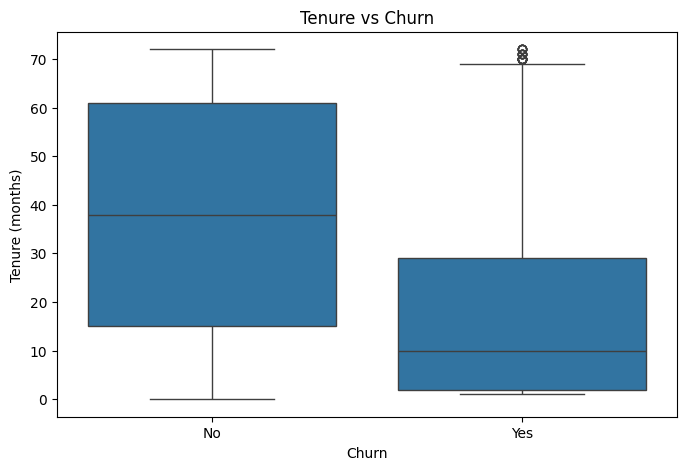

In [5]:
#Tenure vs Churn (Boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.show()


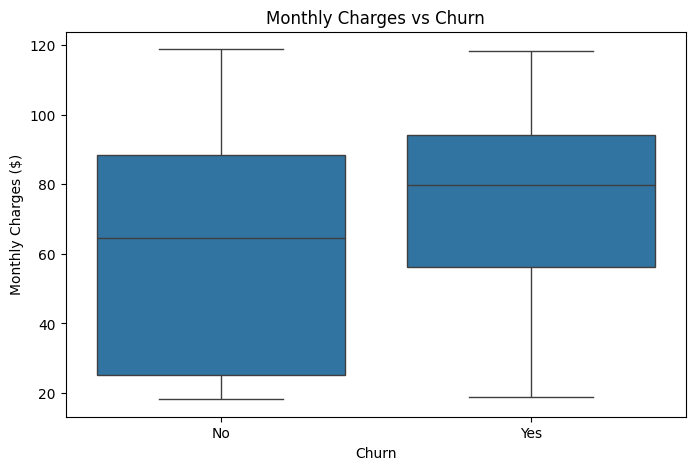

In [6]:
# MonthlyCharges vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges ($)')
plt.show()
